In [123]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
train_features=pd.read_csv("dengue_features_train.csv")
test=pd.read_csv("dengue_features_test.csv")

In [125]:
train_labels=pd.read_csv("dengue_labels_train.csv")
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [126]:
train_data=pd.merge(train_features,train_labels)

In [127]:
train_data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [128]:
train_data['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

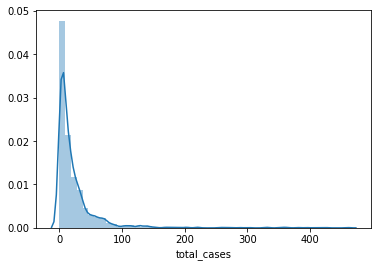

In [129]:
sns.distplot(train_data['total_cases'])

In [130]:
train_data["total_cases"].skew(),train_data['total_cases'].kurt()

(5.273849692657031, 36.51253012179685)

In [131]:
#sns.lmplot(train_data["ndvi_ne"],train_data['total_cases'],train_data)

In [132]:
(train_data[train_data['total_cases']==0].index).shape

(100,)

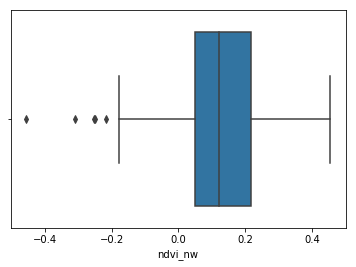

In [133]:
sns.boxplot(train_data['ndvi_nw'])

In [134]:
(train_data['city']=='sj').sum(),(train_data['city']=='iq').sum()

(936, 520)

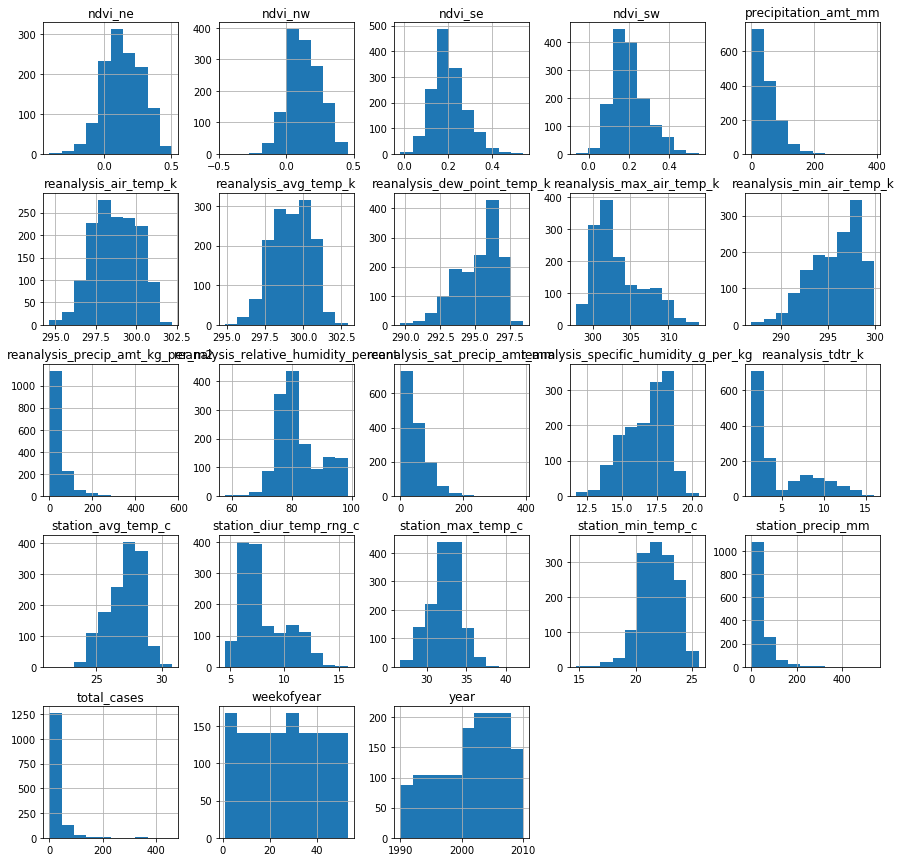

In [135]:

train_data.hist(figsize=(15,15))
plt.show()

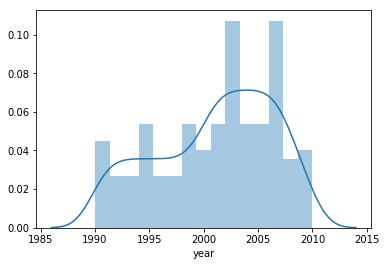

In [136]:
sns.distplot(train_data['year'])

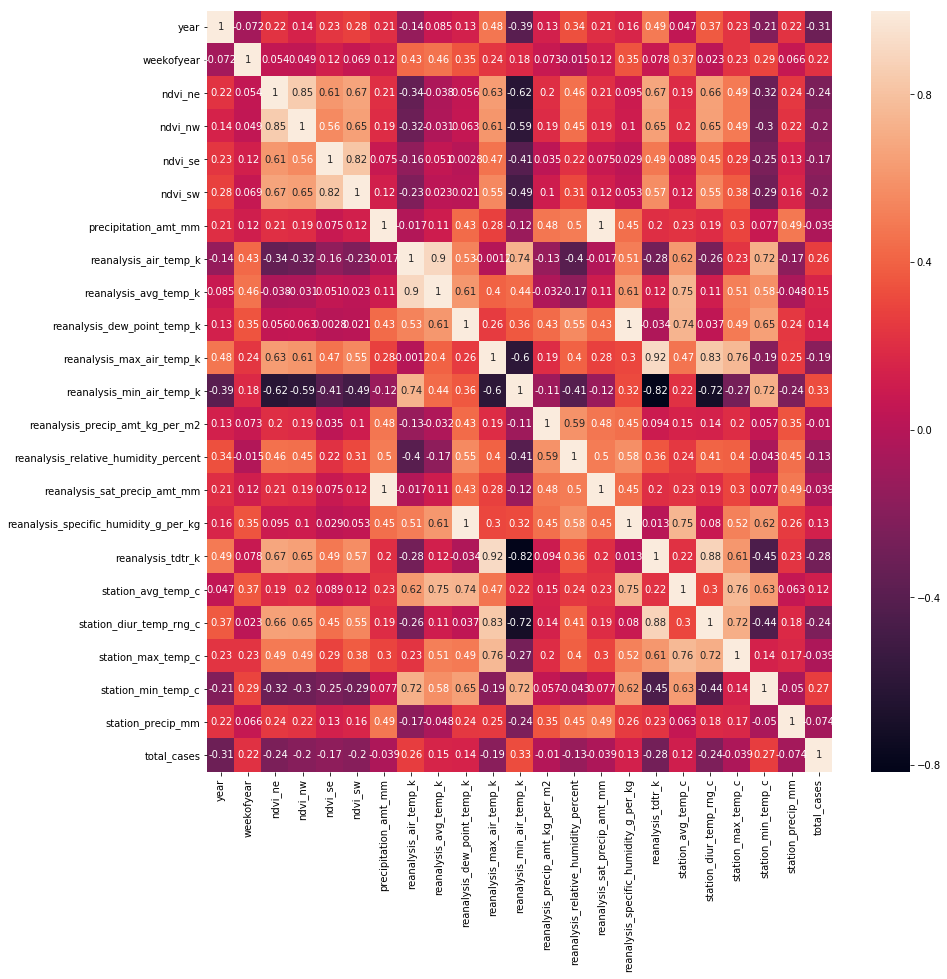

In [137]:
f=plt.subplots(figsize=(14,14))         
sns.heatmap(train_data.corr(),annot=True)

In [138]:
#missing values
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
ndvi_ne,194,0.133242
ndvi_nw,52,0.035714
station_diur_temp_rng_c,43,0.029533
station_avg_temp_c,43,0.029533
ndvi_se,22,0.015110
ndvi_sw,22,0.015110
station_precip_mm,22,0.015110
station_max_temp_c,20,0.013736
station_min_temp_c,14,0.009615
reanalysis_sat_precip_amt_mm,13,0.008929


In [139]:
train_data.iloc[[87,139,399,451,711,763,1118,1170,1378,1430],:]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
399,sj,1998,1,1998-01-01,0.045500,0.047800,0.123986,0.083443,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
711,sj,2004,1,2004-01-01,-0.268300,-0.123700,0.223757,0.176543,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1118,iq,2004,1,2004-01-01,0.202571,0.198967,0.244557,0.187957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1170,iq,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1378,iq,2009,1,2009-01-01,0.151286,0.161686,0.153271,0.119443,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [140]:
train_data.drop([87,139,399,451,711,763,1118,1170,1378,1430],inplace=True)

In [141]:
train_data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  189
ndvi_nw                                   47
ndvi_se                                   17
ndvi_sw                                   17
precipitation_amt_mm                       3
reanalysis_air_temp_k                      0
reanalysis_avg_temp_k                      0
reanalysis_dew_point_temp_k                0
reanalysis_max_air_temp_k                  0
reanalysis_min_air_temp_k                  0
reanalysis_precip_amt_kg_per_m2            0
reanalysis_relative_humidity_percent       0
reanalysis_sat_precip_amt_mm               3
reanalysis_specific_humidity_g_per_kg      0
reanalysis_tdtr_k                          0
station_avg_temp_c                        33
station_diur_temp_rng_c                   33
station_max_temp_c                        10
station_mi

In [142]:

train_data.drop(columns=['precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg'],inplace=True)

In [143]:
test.drop(columns=['precipitation_amt_mm','reanalysis_specific_humidity_g_per_kg'],inplace=True)

In [144]:
train_data.shape

(1446, 23)

In [145]:
train_data.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                 189
ndvi_nw                                  47
ndvi_se                                  17
ndvi_sw                                  17
reanalysis_air_temp_k                     0
reanalysis_avg_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           0
reanalysis_relative_humidity_percent      0
reanalysis_sat_precip_amt_mm              3
reanalysis_tdtr_k                         0
station_avg_temp_c                       33
station_diur_temp_rng_c                  33
station_max_temp_c                       10
station_min_temp_c                        4
station_precip_mm                        12
total_cases                     

In [146]:
#missing values
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
ndvi_ne,189,0.130705
ndvi_nw,47,0.032503
station_diur_temp_rng_c,33,0.022822
station_avg_temp_c,33,0.022822
ndvi_sw,17,0.011757
ndvi_se,17,0.011757
station_precip_mm,12,0.008299
station_max_temp_c,10,0.006916
station_min_temp_c,4,0.002766
reanalysis_sat_precip_amt_mm,3,0.002075


In [147]:
train_data=train_data.reset_index(drop=True)    #very important
l=list(train_data[train_data['ndvi_ne'].isna()].index)
m=list(train_data[train_data['ndvi_nw'].isna()].index)
n=list(train_data[train_data['ndvi_sw'].isna()].index)
o=list(train_data[train_data['ndvi_se'].isna()].index)
veg=set(l).intersection(m).intersection(n).intersection(o)
a=list(train_data[train_data['station_precip_mm'].isna()].index)
b=list(train_data[train_data['station_max_temp_c'].isna()].index)
c=list(train_data[train_data['station_min_temp_c'].isna()].index)   
set(a).intersection(b).intersection(c)
veg=list(veg)

In [148]:
#(np.where(train_data['station_avg_temp_c'].isna()==train_data['station_diur_temp_rng_c'].isna()))
#np.where(train_data[train_data['station_avg_temp_c'].isna()].index==train_data[train_data['station_diur_temp_rng_c'].isna()].index)
t1=list(train_data[train_data['station_diur_temp_rng_c'].isna()].index)
t2=list(train_data[train_data['station_avg_temp_c'].isna()].index)
temp=list(set(t1).intersection(t2))
temp
tot=temp+veg
tot

[1025,
 1160,
 1041,
 1051,
 1182,
 1184,
 1321,
 1067,
 1195,
 1198,
 1199,
 1329,
 1207,
 1341,
 1342,
 1215,
 1343,
 1217,
 1344,
 1219,
 1345,
 1346,
 1357,
 975,
 981,
 1132,
 1264,
 1265,
 1141,
 1142,
 1143,
 1144,
 1145,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 1012,
 189,
 607]

In [149]:
train_data.drop(tot,inplace=True)
train_data=train_data.reset_index(drop=True)

In [150]:
#missing values
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
ndvi_ne,172,0.123209
ndvi_nw,30,0.021490
station_precip_mm,10,0.007163
reanalysis_sat_precip_amt_mm,3,0.002149
total_cases,0,0.000000
reanalysis_avg_temp_k,0,0.000000
year,0,0.000000
weekofyear,0,0.000000
week_start_date,0,0.000000
ndvi_se,0,0.000000


In [151]:
for i in train_data.columns:
    if train_data[i].isnull().sum()>0:
        train_data[i].fillna(train_data[i].mean(),inplace=True)

In [152]:
for i in test.columns:
    if test[i].isnull().sum()>0:
        test[i].fillna(test[i].mean(),inplace=True)

In [153]:
test.isnull().sum()

city                                    0
year                                    0
weekofyear                              0
week_start_date                         0
ndvi_ne                                 0
ndvi_nw                                 0
ndvi_se                                 0
ndvi_sw                                 0
reanalysis_air_temp_k                   0
reanalysis_avg_temp_k                   0
reanalysis_dew_point_temp_k             0
reanalysis_max_air_temp_k               0
reanalysis_min_air_temp_k               0
reanalysis_precip_amt_kg_per_m2         0
reanalysis_relative_humidity_percent    0
reanalysis_sat_precip_amt_mm            0
reanalysis_tdtr_k                       0
station_avg_temp_c                      0
station_diur_temp_rng_c                 0
station_max_temp_c                      0
station_min_temp_c                      0
station_precip_mm                       0
dtype: int64

In [154]:
# from scipy.stats import norm
# from scipy import stats
# train_data['reanalysis_air_temp_k']=np.log(train_data['reanalysis_air_temp_k'])
# sns.distplot(train_data['reanalysis_air_temp_k'],fit=norm)
# fig=plt.figure()
# res=stats.probplot(train_data['reanalysis_air_temp_k'],plot=plt)

In [155]:
# train_data['reanalysis_air_temp_k']=np.log(train_data['reanalysis_air_temp_k'])
# sns.distplot(train_data['reanalysis_avg_temp_k'],fit=norm)
# fig=plt.figure()
# res=stats.probplot(train_data['reanalysis_avg_temp_k'],plot=plt)

In [156]:
# train_data['reanalysis_dew_point_temp_k']=np.log(train_data['reanalysis_dew_point_temp_k'])
# sns.distplot(train_data['reanalysis_dew_point_temp_k'],fit=norm)
# fig=plt.figure()
# res=stats.probplot(train_data['reanalysis_dew_point_temp_k'],plot=plt)

In [157]:
#sns.pairplot(train_data,size=2.5)

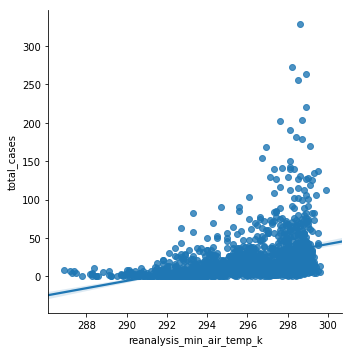

In [158]:
sns.lmplot('reanalysis_min_air_temp_k','total_cases',train_data)

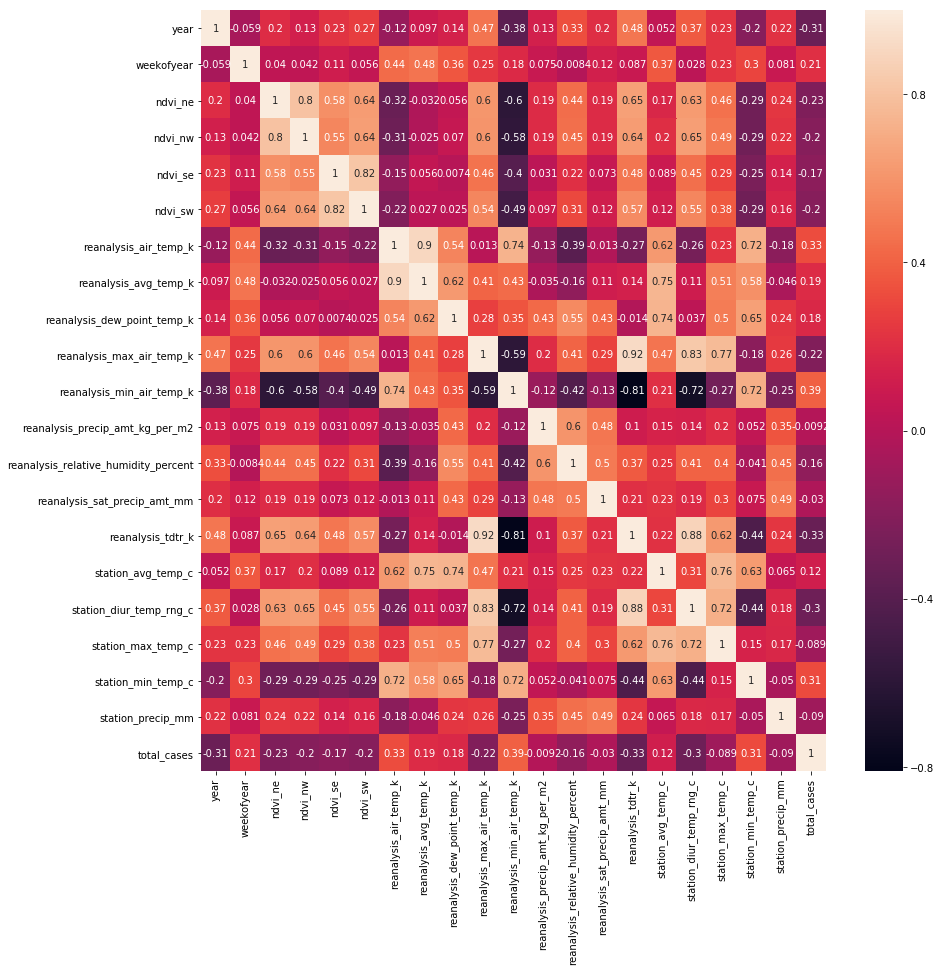

In [159]:
f=plt.subplots(figsize=(14,14))
sns.heatmap(train_data.corr(),annot=True)

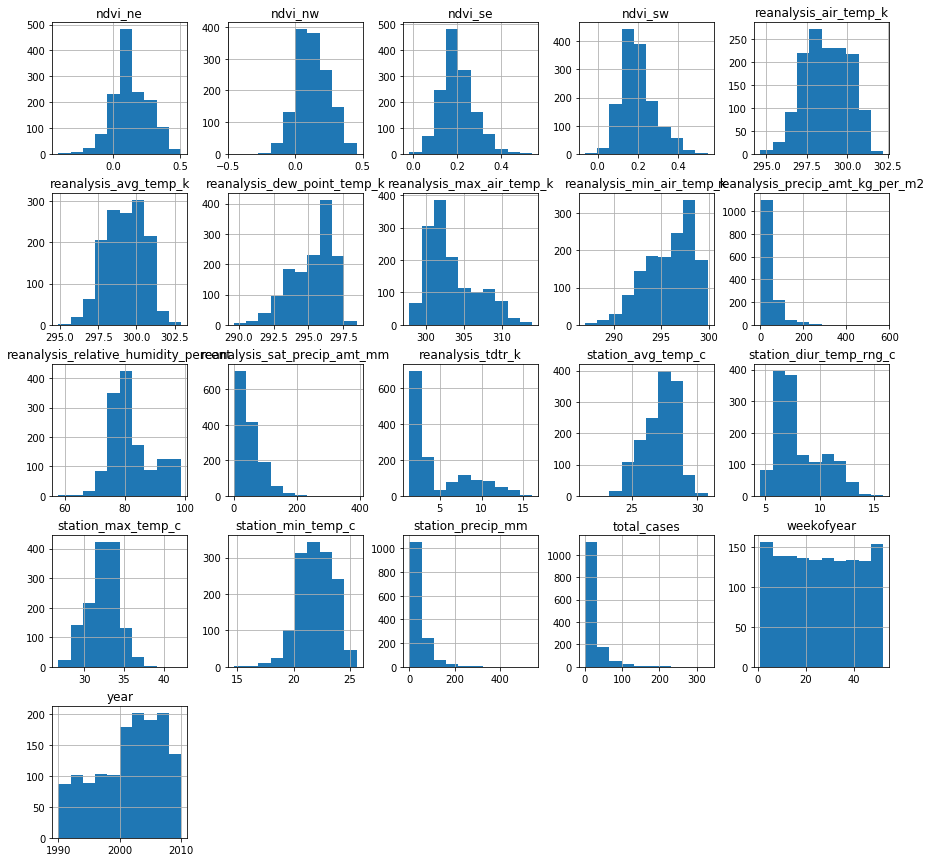

In [160]:
train_data.hist(figsize=(15,15))
plt.show()

In [161]:
train_data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,...,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,2001.001433,26.310172,0.139145,0.127900,0.202532,0.200665,298.725025,299.237331,295.252111,303.373424,...,40.146927,82.055258,45.758543,4.823005,27.183246,8.068698,32.438109,22.123352,39.347330,21.968481
std,5.403968,14.884952,0.131026,0.118223,0.073412,0.083224,1.359600,1.263993,1.529535,3.231297,...,43.755075,7.099024,43.885839,3.502118,1.296362,2.137550,1.972763,1.560406,47.636423,30.801255
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,294.635714,294.892857,289.642857,297.800000,...,0.000000,57.787143,0.000000,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.000000,0.053200,0.049217,0.154321,0.143543,297.675357,298.262500,294.119643,300.975000,...,13.175000,77.143571,9.717500,2.328571,26.300000,6.514286,31.100000,21.100000,8.900000,5.000000
50%,2002.000000,26.000000,0.139145,0.121282,0.195207,0.187371,298.669286,299.307143,295.642143,302.400000,...,27.080000,80.252857,38.515000,2.821429,27.417143,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.000000,0.227871,0.209188,0.246706,0.244183,299.855714,300.221429,296.478571,305.400000,...,52.042500,85.677143,70.175000,7.432143,28.157143,9.600000,33.900000,23.300000,53.600000,27.000000
max,2010.000000,52.000000,0.508357,0.454429,0.538314,0.546017,302.200000,302.928571,298.450000,314.000000,...,570.500000,98.610000,390.600000,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,329.000000


In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [163]:
le=LabelEncoder()
train_data['city']=le.fit_transform(train_data['city'])
test['city']=le.transform(test['city'])

In [164]:
train_data.drop(columns=['week_start_date'],inplace=True)
test.drop(columns=['week_start_date'],inplace=True)

In [165]:
test.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1,2008,18,-0.01890,-0.018900,0.102729,0.091200,298.492857,298.550000,294.527143,...,296.4,25.37,78.781429,78.60,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,1,2008,19,-0.01800,-0.012400,0.082043,0.072314,298.475714,298.557143,294.395714,...,296.7,21.83,78.230000,12.56,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,1,2008,20,-0.00150,0.126803,0.151083,0.091529,299.455714,299.357143,295.308571,...,296.4,4.12,78.270000,3.66,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,1,2008,21,0.12605,-0.019867,0.124329,0.125686,299.690000,299.728571,294.402857,...,296.9,2.20,73.015714,0.00,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,1,2008,22,0.05680,0.039833,0.062267,0.075914,299.780000,299.671429,294.760000,...,297.3,4.36,74.084286,0.76,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [166]:
train_data.shape

(1396, 22)

In [167]:
x=train_data.iloc[:,0:21]
y=train_data.iloc[:,21:]

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [169]:
#clf=LinearRegression()
#clf=DecisionTreeRegressor()
clf=RandomForestRegressor(n_estimators=500,n_jobs=-1,criterion='mae')
clf.fit(x,y)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [170]:
y_pred=clf.predict(test)
y_pred=y_pred.round()
y_pred=y_pred.astype(int)

In [171]:
y_pred.shape,test.shape

((416,), (416, 21))

In [172]:
city=(le.inverse_transform(test['city']))

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [173]:
d=np.c_[city,test['year'],test['weekofyear'],y_pred]
d=pd.DataFrame(d)
d.head() 

,0,1,2,3
0,sj,2008,18,5
1,sj,2008,19,6
2,sj,2008,20,6
3,sj,2008,21,9
4,sj,2008,22,10


In [174]:
d.to_csv('sub_2.csv',index=False,header=['city','year','weekofyear','total_cases']) 

In [175]:
d.shape

(416, 4)

In [176]:
d.head()

,0,1,2,3
0,sj,2008,18,5
1,sj,2008,19,6
2,sj,2008,20,6
3,sj,2008,21,9
4,sj,2008,22,10


In [178]:
(train_data['city']==1).sum(),(train_data['city']==0).sum()

(914, 482)